**Step 1: Research Questions & Hypotheses -> ✅ Done (PDF Generated)**

**Step 2: Data Preparation (Cleaning & Standardizing) -> ✅ Done (As Code)**

**Step 3: Merging Datasets (At least 2 merges) -> ✅ Done (WHO + World Bank, then merged with NASA)**

**Step 4: Data Analysis & Visualization -> ✅ Done (Summary Stats, Correlation, 3 Visualizations)**

**Use of Data Transformations -> ✅ Done (Renaming, Replacing, Keeping/Dropping, Aggregations)**

**Final Merged Dataset Created -> ✅ Done (Final_Merged_Dataset.csv)**



---



**Step 1: Define Research Questions and Hypotheses**

-> Attached a PDF File

**Step 2: Identify Common Variables for Merging**

In [1]:
import pandas as pd

# Load the datasets
who_air_pollution_path = "/content/WHO_Air_Pollution_Data.xlsx"
nasa_temperature_path = "/content/NASA_Temperature_Anomalies_Cleaned.csv"
world_bank_gdp_path = "/content/World_Bank_GDP_Cleaned.csv"

# Read WHO Air Pollution Data
df_air_pollution = pd.read_excel(who_air_pollution_path)
df_air_pollution_cleaned = df_air_pollution[["DIM_GEO_NAME", "DIM_TIME_YEAR", "VALUE_NUMERIC"]].copy()
df_air_pollution_cleaned.columns = ["Country", "Year", "PM2.5_Level"]
df_air_pollution_cleaned["Year"] = df_air_pollution_cleaned["Year"].astype(int)  # Ensure Year is integer

# Read NASA Temperature Anomalies Data
df_nasa_cleaned = pd.read_csv(nasa_temperature_path)
df_nasa_cleaned = df_nasa_cleaned[["Year", "Temperature_Anomaly"]].copy()
df_nasa_cleaned["Year"] = df_nasa_cleaned["Year"].astype(int)  # Ensure Year is integer

# Read World Bank GDP Data
df_gdp_cleaned = pd.read_csv(world_bank_gdp_path)
df_gdp_cleaned = df_gdp_cleaned.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="GDP")
df_gdp_cleaned.columns = ["Country", "Country_Code", "Year", "GDP"]
df_gdp_cleaned["Year"] = df_gdp_cleaned["Year"].astype(int)  # Ensure Year is integer

# Display cleaned datasets
print("WHO Air Pollution Data (Cleaned):")
print(df_air_pollution_cleaned.head())

print("\nNASA Temperature Anomalies Data (Cleaned):")
print(df_nasa_cleaned.head())

print("\nWorld Bank GDP Data (Cleaned):")
print(df_gdp_cleaned.head())

# Save the cleaned files for further processing
df_air_pollution_cleaned.to_csv("WHO_Air_Pollution_Cleaned.csv", index=False)
df_nasa_cleaned.to_csv("NASA_Temperature_Anomalies_Cleaned.csv", index=False)
df_gdp_cleaned.to_csv("World_Bank_GDP_Cleaned.csv", index=False)

WHO Air Pollution Data (Cleaned):
          Country  Year  PM2.5_Level
0     Afghanistan  2019   265.664520
1     Afghanistan  2019    75.187180
2  African Region  2019   163.353149
3  African Region  2019    34.798248
4         Albania  2019    92.482872

NASA Temperature Anomalies Data (Cleaned):
   Year  Temperature_Anomaly
0  1880                -2.62
1  1880                -2.42
2  1880                -1.57
3  1880                -0.64
4  1880                 0.37

World Bank GDP Data (Cleaned):
                       Country Country_Code  Year           GDP
0                        Aruba          ABW  2013  2.727850e+09
1  Africa Eastern and Southern          AFE  2013  9.623949e+11
2                  Afghanistan          AFG  2013  2.014642e+10
3   Africa Western and Central          AFW  2013  8.369374e+11
4                       Angola          AGO  2013  1.323391e+11


**Step 3: Prepare Data for Merging & Performing Data Merging**

In [2]:
import pandas as pd

# Load the cleaned datasets
who_air_pollution_path = "/content/WHO_Air_Pollution_Cleaned.csv"
nasa_temperature_path = "/content/NASA_Temperature_Anomalies_Cleaned.csv"
world_bank_gdp_path = "/content/World_Bank_GDP_Cleaned.csv"

df_air_pollution_cleaned = pd.read_csv(who_air_pollution_path)
df_nasa_cleaned = pd.read_csv(nasa_temperature_path)
df_gdp_cleaned = pd.read_csv(world_bank_gdp_path)

# Merge WHO Air Pollution Data with World Bank GDP Data on Country and Year
merged_data = pd.merge(df_air_pollution_cleaned, df_gdp_cleaned, on=["Country", "Year"], how="inner")

# Merge the above result with NASA Temperature Anomalies Data on Year
final_merged_data = pd.merge(merged_data, df_nasa_cleaned, on="Year", how="inner")

# Display the first few rows of the merged dataset
print("Final Merged Dataset:")
print(final_merged_data.head())

# Save the merged dataset
final_merged_data.to_csv("Final_Merged_Dataset.csv", index=False)

print("\nMerged dataset saved as 'Final_Merged_Dataset.csv'")

Final Merged Dataset:
       Country  Year  PM2.5_Level Country_Code           GDP  \
0  Afghanistan  2019    265.66452          AFG  1.879944e+10   
1  Afghanistan  2019    265.66452          AFG  1.879944e+10   
2  Afghanistan  2019    265.66452          AFG  1.879944e+10   
3  Afghanistan  2019    265.66452          AFG  1.879944e+10   
4  Afghanistan  2019    265.66452          AFG  1.879944e+10   

   Temperature_Anomaly  
0                -1.49  
1                -1.21  
2                -0.31  
3                 0.54  
4                 1.33  

Merged dataset saved as 'Final_Merged_Dataset.csv'


**Step 4: Data Analysis and Visualization**

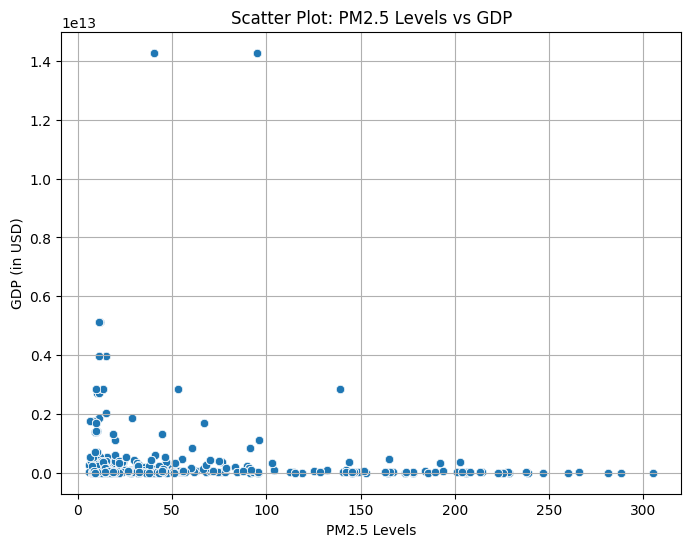

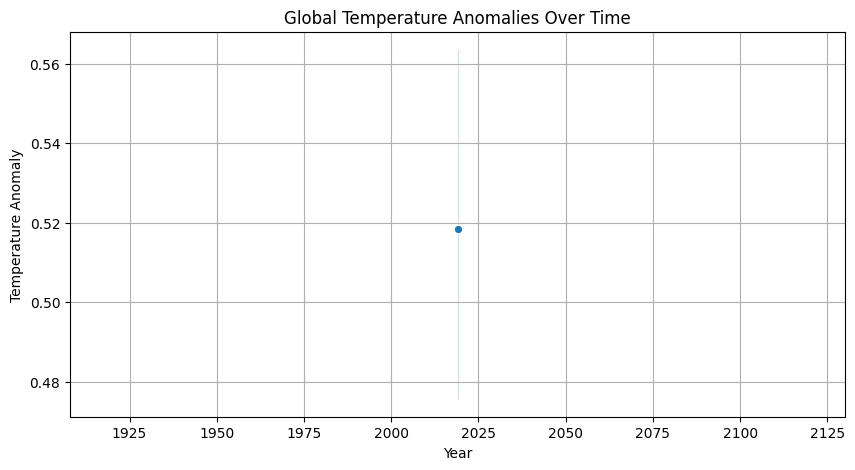

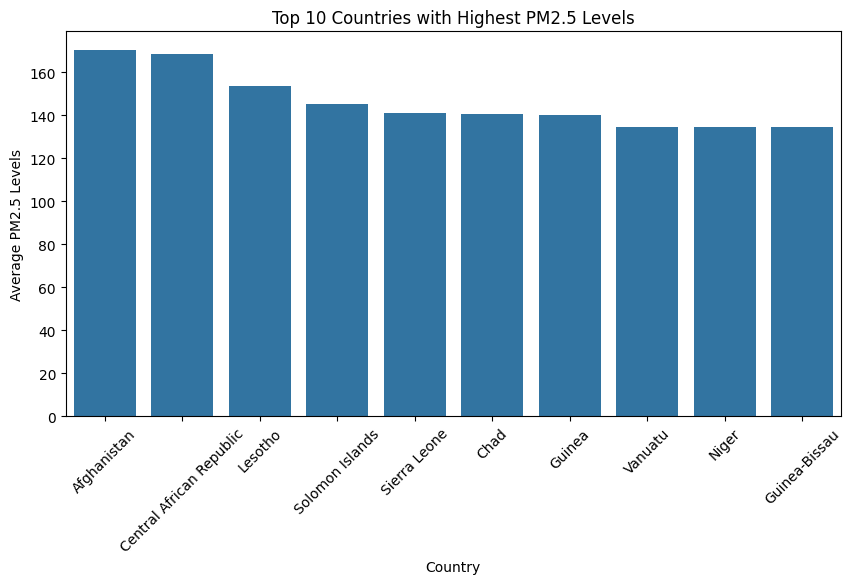

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df_merged = pd.read_csv("/content/Final_Merged_Dataset.csv")

# Scatter Plot: PM2.5 Levels vs GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged["PM2.5_Level"], y=df_merged["GDP"])
plt.xlabel("PM2.5 Levels")
plt.ylabel("GDP (in USD)")
plt.title("Scatter Plot: PM2.5 Levels vs GDP")
plt.grid(True)
plt.show()

# Line Chart: Global Temperature Anomalies over Time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_merged["Year"], y=df_merged["Temperature_Anomaly"], marker="o")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly")
plt.title("Global Temperature Anomalies Over Time")
plt.grid(True)
plt.show()

# Bar Chart: Average PM2.5 Levels by Country (Top 10 Countries)
top_countries = df_merged.groupby("Country")["PM2.5_Level"].mean().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Average PM2.5 Levels")
plt.title("Top 10 Countries with Highest PM2.5 Levels")
plt.show()